<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>

<h1>A2: Regression Model Development</h1>
<i>Computational Data Analytics with Python - DAT-5390 - Assignment Submission</i>
<br>
<br>
<br>

Written by Sanskriti Garg - Student of Master of Business Analytics<br>
Hult International Business School, San Francisco<br>
<br>
<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


<h2>Methodology</h2><br>

We start by exploring the dataset and understanding the data type, data format and existence of any missing values in the set.After that we divide the data into different data types (continuous, interval and categorical). 

<h3>Response Variable</h3><br>

We identify the response variable (also given in the assignment description - REVENUE), understand its distribution and correct for any skewness. We convert the response variable to logarithmic scale to correct for skewness. We call it LOG_REVENUE. 

We will decide whether to use REVENUE or LOG_REVENUE as our response variable towards the end, basis the correlation of original features and engineered features. 

<h3>Independent Variables </h3><br>
We go on to check the other features and their distribution. We also see the skewness of these features and the correlation with both REVENUE and LOG_REVENUE. 

We have used different models to identify feature importance to help us get an understanding on the impact of different features on both the potential response variables. 

Next, we treat the features basis their data type, see their impact on the response variable, use them to engineer new features and check the impact of new features on the response variables. 

Basis this, we finalize the features for our model. 

<h3>Models </h3>

We try multiple models for the identified features and select the best model for the assignment deliverable. 

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Assumption</h2>

1. REVENUE is a continuous variable.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [1]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import numpy as np # mathematical essentials

# setting pandas print options
# shows everything in the data
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = 'Apprentice_Chef_Dataset_2023.xlsx'

# reading the file into Python
chef = pd.read_excel( io         = file,
                      sheet_name = 0,
                      header     = 0
                    )


# outputting the first ten rows of the dataset to understand the data
chef.head(n = 10).sort_values(by = 'REVENUE', ascending = False)

,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
1,6150.0,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680
9,5745.0,Androw Frey,androw.frey@protonmail.com,Androw,Frey,297,8,1,6,266.8,1,6,1,32,0,140.88,8,2.894737,664
7,5000.0,Bandy,bandy@aol.com,Bandy,Bandy,251,10,1,1,269.6,4,5,2,40,0,143.00,8,2.894737,1095
0,4920.0,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456
6,3901.5,Utt,utt@passport.com,Utt,Utt,316,10,1,5,183.8,2,5,2,46,4,140.01,6,3.157895,584
2,3435.0,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145
4,3427.5,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174
3,3330.0,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418
8,3090.0,Rickard Karstark,rickard.karstark@live.com,Rickard,Karstark,256,7,1,5,218.4,2,6,1,30,0,120.34,6,2.894737,198
5,2917.5,Rollam Westerling,rollam.westerling@jnj.com,Rollam,Westerling,246,7,1,2,240.3,1,5,1,20,0,240.90,8,4.473684,16


In [2]:
# Understanding the size of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {chef.shape[0]}
Features:     {chef.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     19



In [3]:
# INFOrmation about each variable
chef.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   NAME                         1946 non-null   object 
 2   EMAIL                        1946 non-null   object 
 3   FIRST_NAME                   1946 non-null   object 
 4   FAMILY_NAME                  1900 non-null   object 
 5   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 6   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 7   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 8   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 9   AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 10  CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 11  PC_LOGINS                    1946 non-null   int64  
 12  MOBILE_LOGINS                1946 non-null   int64  
 13  WEEKLY_PLAN       

In [4]:
# descriptive statistics for numeric data
chef.describe(include = 'number').round(decimals = 2)

,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,74.63,6.98,4.9,5.38,150.56,1.57,5.52,1.48,11.33,2.05,99.60,4.44,3.55,113.15
std,1138.29,55.31,2.28,2.5,3.04,49.45,1.61,0.58,0.53,13.57,3.79,62.34,1.55,0.61,177.15
min,131.00,11.00,1.00,1.0,1.00,33.40,0.00,4.00,0.00,0.00,0.00,10.33,1.00,1.32,1.00
25%,1350.00,39.00,5.00,3.0,3.00,114.40,0.00,5.00,1.00,1.00,0.00,72.00,3.00,3.16,10.00
50%,1740.00,60.00,7.00,5.0,5.00,145.60,1.00,6.00,1.00,7.00,0.00,94.16,4.00,3.42,17.00
75%,2670.00,95.00,8.00,7.0,8.00,173.78,2.00,6.00,2.00,13.00,3.00,117.29,5.00,3.95,174.00
max,8793.75,493.00,18.00,19.0,10.00,564.20,13.00,7.00,3.00,52.00,18.00,1645.60,11.00,5.00,1600.00


In [5]:
# descriptive statistics for object data
chef.describe(include = 'object')

,NAME,EMAIL,FIRST_NAME,FAMILY_NAME
count,1946,1946,1946,1900
unique,1946,1946,1442,1070
top,Steffon Baratheon,steffon.baratheon@yahoo.com,Jon,Frey
freq,1,1,21,79


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h3> Data Type Identification</h3><br>

Classifying the above data as continuous, interval/count and categorical/other


<b><u>CONTINUOUS

AVG_TIME_PER_SITE_VISIT   
WEEKLY_PLAN   
AVG_MEAN_RATING
LARGEST_ORDER_SIZE
REVENUE (Y-variable)

<b><u>INTERVAL/COUNT 

TOTAL_MEALS_ORDERED 
UNIQUE_MEALS_PURCH    
CONTACTS_W_CUSTOMER_SERVICE 
PRODUCT_CATEGORIES_VIEWED    
CANCELLATIONS_AFTER_NOON  
PC_LOGINS  
MOBILE_LOGINS           
WEEKLY_PLAN   
LATE_DELIVERIES   
TOTAL_PHOTOS_VIEWED    

<b><u>CATEGORICAL/OTHER

NAME
EMAIL
FIRST_NAME  
FAMILY_NAME 
    
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h3> Feature distribution and skewness</h3><br>    
Next, we try to understand the distribution of all the features in the dataset along with their skewness. Skewness will help us identify whether a feature might need a logarithmic transformation or not. 
    

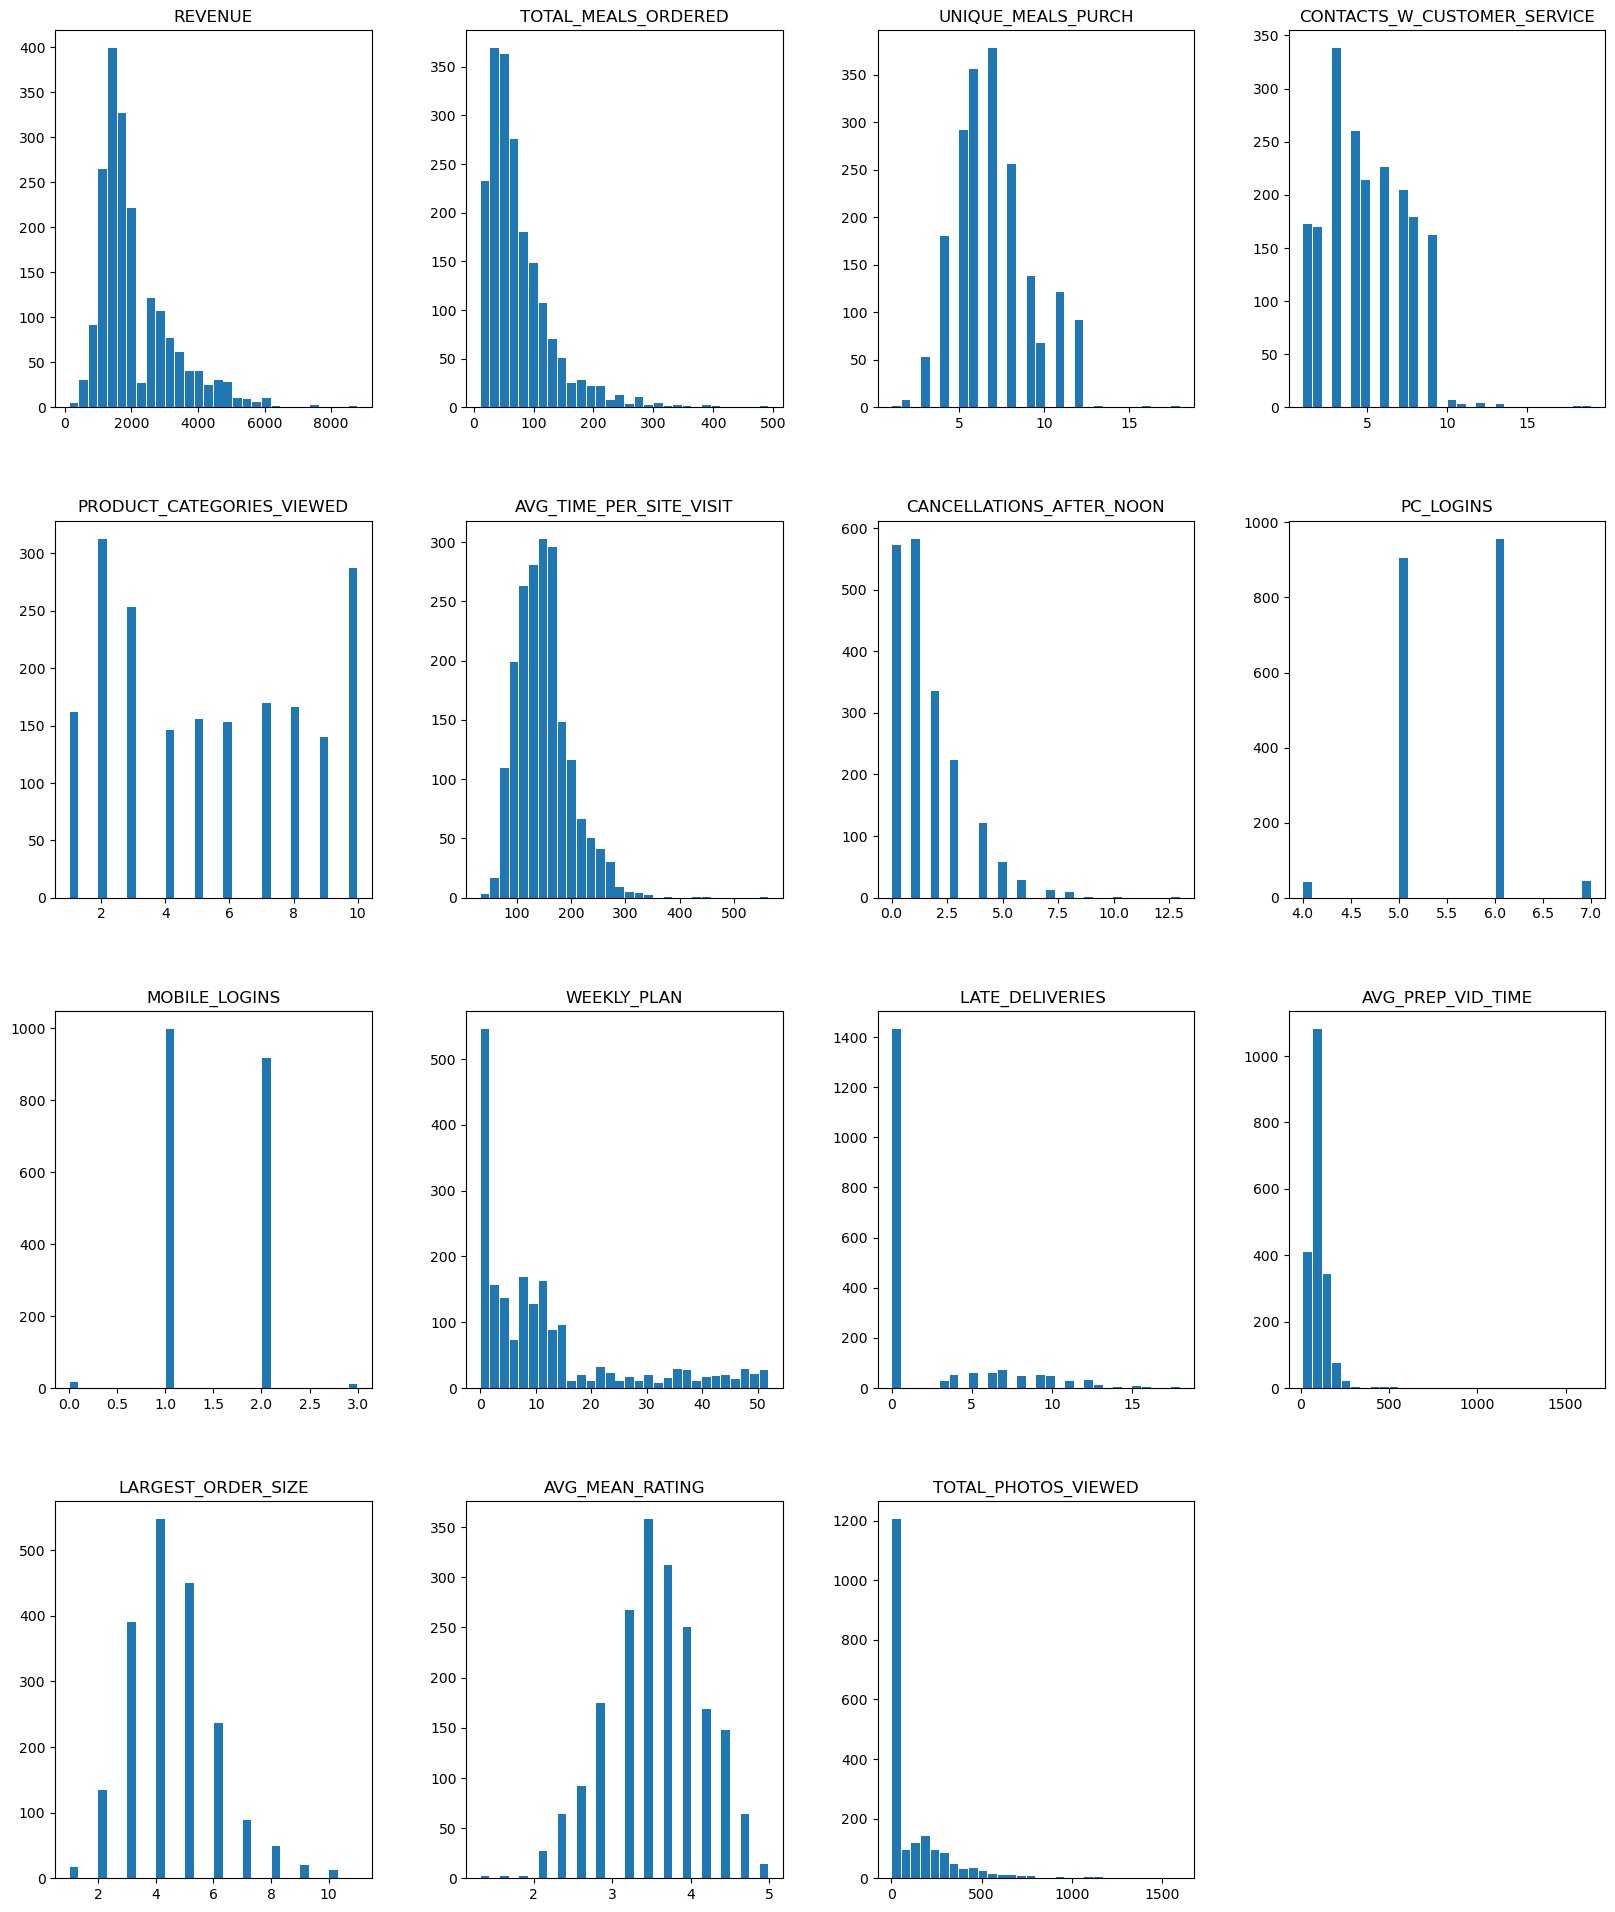

In [6]:
# Checking for distribution of Features
chef[chef._get_numeric_data().columns.to_list()].hist(
    bins=30,
    figsize=(20, 24),
    grid = False,
    rwidth = 0.9,
)
plt.show()

In [7]:
# Checking for skewness of Features
chef.skew().round(decimals = 2)

C:\Users\nitin\AppData\Local\Temp\ipykernel_26244\4030346098.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  chef.skew().round(decimals = 2)


REVENUE                        1.63
TOTAL_MEALS_ORDERED            2.01
UNIQUE_MEALS_PURCH             0.57
CONTACTS_W_CUSTOMER_SERVICE    0.37
PRODUCT_CATEGORIES_VIEWED      0.16
AVG_TIME_PER_SITE_VISIT        1.20
CANCELLATIONS_AFTER_NOON       1.44
PC_LOGINS                     -0.04
MOBILE_LOGINS                  0.05
WEEKLY_PLAN                    1.54
LATE_DELIVERIES                1.71
AVG_PREP_VID_TIME              9.64
LARGEST_ORDER_SIZE             0.70
AVG_MEAN_RATING               -0.11
TOTAL_PHOTOS_VIEWED            2.60
dtype: float64

<br><b>Note:</b>
In the above data we see that REVENUE, TOTAL_MEALS_ORDERED, AVG_TIME_PER_SITE_VISIT, AVG_TIME_PER_SITE_VISIT, WEEKLY_PLAN, WEEKLY_PLAN, AVG_PREP_VID_TIME and TOTAL_PHOTOS_VIEWED are skewed. Hence, there might be a need to do a logarithmic transformation on them. However, we need to be careful that we do not perform logarithmic transformation on interval data.
<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3>Analyzing the Distribution of Response Variable - Revenue (Y-variable)</h3><br>

Below we develop a histogram plot for our Y-variable - REVENUE. The histogram shows that 2 peaks (one major and one minor). However, we will treat REVENUE as a continuous variable. This is our assumption for the modeling. 

Also, as seen above, the skewness for REVENUE is greater than 1 and since it is a continuous variable, we will correct the skewness by converting REVENUE to logarithmic scale.

Further, basis our analysis at later stage we will finalize which will be our response variable - REVENUE or LOG_REVENUE

ASSUMPTION 1 : REVENUE is a continuous variable

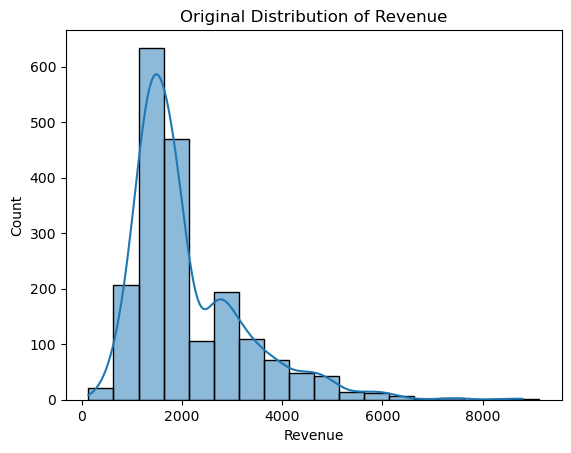

In [8]:
# developing a histogram using HISTPLOT for Revenue
sns.histplot (data   = chef    ,
              x      = 'REVENUE' ,
              kde    = True,
              binwidth = 500) # showing the line graph 


# title and axis labels
plt.title(label   = "Original Distribution of Revenue")
plt.xlabel(xlabel = "Revenue") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()

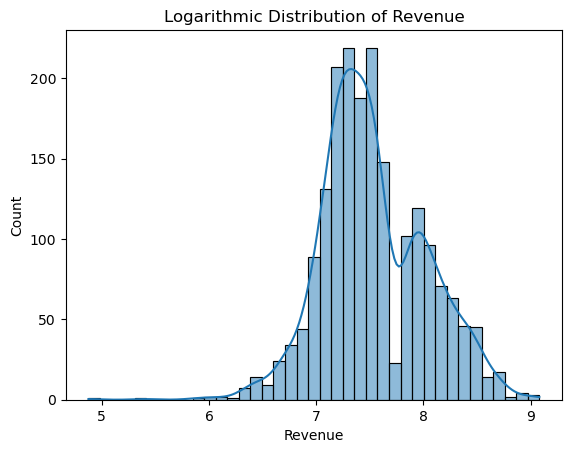

REVENUE        1.626573
LOG_REVENUE    0.184090
dtype: float64

In [9]:
# log transforming REVENUE and saving it to the dataset
chef['LOG_REVENUE'] = np.log(chef['REVENUE'])

# developing a histogram using HISTPLOT
sns.histplot(data   = chef,
             x      = 'LOG_REVENUE',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Revenue")
plt.xlabel(xlabel = "Revenue") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

# compraing Skew between REVENUE and LOG_REVENUE
chef[ ['REVENUE', 'LOG_REVENUE'] ].skew() # skew reduces with log

<br><b>Note:</b> When we convert REVENUE to a logarithmic scale (LOG_REVENUE), we see that the skewness goes down from 1.626 to 0.184, reducing the degree of asymmetry.<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Checking for missing values</h3><br>

Upon analyzing we understand that the dataset has 46 missing value, all in FAMILY_NAME.

In [10]:
# Checking for missing values
chef.isnull().sum(axis = 0)

REVENUE                         0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    46
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
CANCELLATIONS_AFTER_NOON        0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
LATE_DELIVERIES                 0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
AVG_MEAN_RATING                 0
TOTAL_PHOTOS_VIEWED             0
LOG_REVENUE                     0
dtype: int64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3>Correcting incorrectly labeled columns</h3><br>

Two columns have been incorrectly labeled. Below we have corrected the errors in the column name labels. 

1. LATE_DELIVERIES column has a space in the error leading to error upon being called
2. LARGEST_ORDER_SIZE is actually the average meals ordered. 

For above we have created two new columns with correct labels.

In [11]:
# Correcting erroneous columns 
# 1. Removing space from the column name 'LATE_DELIVERIES '
# 2. Correcting Column name 'LARGEST_ORDER_SIZE' to ' AVG_MEALS_ORDERED'

chef['c_LATE_DELIVERIES']   = chef['LATE_DELIVERIES ']
chef['c_AVG_MEALS_ORDERED'] = chef['LARGEST_ORDER_SIZE']

# Checking if the correction has been incorporated
chef.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   NAME                         1946 non-null   object 
 2   EMAIL                        1946 non-null   object 
 3   FIRST_NAME                   1946 non-null   object 
 4   FAMILY_NAME                  1900 non-null   object 
 5   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 6   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 7   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 8   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 9   AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 10  CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 11  PC_LOGINS                    1946 non-null   int64  
 12  MOBILE_LOGINS                1946 non-null   int64  
 13  WEEKLY_PLAN       

<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Log transforming features with skewness more than 1 or less than -1.

In [12]:
# log transforming features with skewness more than 1 or less than -1
chef['LOG_TOTAL_MEALS_ORDERED'] = np.log(chef['TOTAL_MEALS_ORDERED'] + 0.001)
chef['LOG_AVG_TIME_PER_SITE_VISIT'] = np.log(chef['AVG_TIME_PER_SITE_VISIT'] + 0.001)
chef['LOG_CANCELLATIONS_AFTER_NOON'] = np.log(chef['CANCELLATIONS_AFTER_NOON']+ 0.001)
chef['LOG_WEEKLY_PLAN'] = np.log(chef['WEEKLY_PLAN'] + 0.001)
chef['LOG_c_LATE_DELIVERIES'] = np.log(chef['c_LATE_DELIVERIES']+ 0.001)
chef['LOG_AVG_PREP_VID_TIME'] = np.log(chef['AVG_PREP_VID_TIME'] + 0.001)
chef['LOG_TOTAL_PHOTOS_VIEWED'] = np.log(chef['TOTAL_PHOTOS_VIEWED'] + 0.001)

# Displaying INFOrmation with updated columns
chef.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   REVENUE                       1946 non-null   float64
 1   NAME                          1946 non-null   object 
 2   EMAIL                         1946 non-null   object 
 3   FIRST_NAME                    1946 non-null   object 
 4   FAMILY_NAME                   1900 non-null   object 
 5   TOTAL_MEALS_ORDERED           1946 non-null   int64  
 6   UNIQUE_MEALS_PURCH            1946 non-null   int64  
 7   CONTACTS_W_CUSTOMER_SERVICE   1946 non-null   int64  
 8   PRODUCT_CATEGORIES_VIEWED     1946 non-null   int64  
 9   AVG_TIME_PER_SITE_VISIT       1946 non-null   float64
 10  CANCELLATIONS_AFTER_NOON      1946 non-null   int64  
 11  PC_LOGINS                     1946 non-null   int64  
 12  MOBILE_LOGINS                 1946 non-null   int64  
 13  WEE

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3>Correlation between features, REVENUE and LOG_REVENUE</h3><br>
Here we see the correlation between different features and REVENUE and LOG REVENUE, our potential response variable. This correlation will help us identify the important features impacting the y-variable. 

We find that AVG_TIME_PER_SITE_VISIT, LOG_TOTAL_MEALS_ORDERED, TOTAL_PHOTOS_VIEWED, c_AVG_MEALS_ORDERED and AVG_MEAN_RATING have good correlation with both REVENUE and LOG_REVENUE. They can therefore be said to influence the y-variable greatly. 

In [13]:
# creating a (Pearson) correlation matrix
df_corr = chef.corr().round(2)


# printing (Pearson) correlations with REVENUE and LOG_REVENUE
df_corr.loc[ : , ['REVENUE', 'LOG_REVENUE'] ].sort_values(by = 'REVENUE',
                                                                ascending = False)

,REVENUE,LOG_REVENUE
REVENUE,1.00,0.95
LOG_REVENUE,0.95,1.00
AVG_TIME_PER_SITE_VISIT,0.64,0.65
LOG_AVG_TIME_PER_SITE_VISIT,0.63,0.67
LOG_TOTAL_MEALS_ORDERED,0.61,0.69
TOTAL_MEALS_ORDERED,0.60,0.61
TOTAL_PHOTOS_VIEWED,0.46,0.43
c_AVG_MEALS_ORDERED,0.44,0.45
LARGEST_ORDER_SIZE,0.44,0.45
LOG_TOTAL_PHOTOS_VIEWED,0.42,0.42


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3>Checking feature Importance</h3><br>

We have used the plot_feature_importance function discussed in class to check feature importance as per a couple of models. 

We have used below models to arrive at important features:

1. Lasso Regression
2. Decision Tree Regressor
3. Random Forest Regressor 
4. Gradient Boosting Regressor

As per the models below are the important features:

1. LOG_AVG_TIME_PER_SITE_VISIT
2. AVG_TIME_PER_SITE_VISIT
3. TOTAL_PHOTOS_VIEWED
4. LOG_TOTAL_PHOTOS_VIEWED
5. AVG_MEAN_RATING
6. CONTACTS_W_CUSTOMER_SERVICE
7. TOTAL_MEALS_ORDERED

This gives us a starting point. We will check the correlation with REVENUE and pick the variables with higher correlations. We are not checking this with LOG_REVENUE since a variable important to REVENUE will also be important to LOG_REVENUE. We will also chose between the variables and their log transformation and not keep both of them as that will cause inaccurate model result. 

<b>Note:</b><br>
We have dropped categorical data features like name, family name, email id for this exercise.

In [14]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : model for which feature importance is being determined
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [15]:
# Dropping categorical features
x_data = chef.drop(['REVENUE', 'LOG_REVENUE', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME'], axis = 1)


# preparing y-variable
y_data = chef.loc[ : , 'REVENUE']    # y-variable 

In [16]:
# importing machine learning models
from sklearn.tree     import DecisionTreeRegressor     # regression trees
from sklearn.ensemble import RandomForestRegressor     # random forest
from sklearn.ensemble import GradientBoostingRegressor # gbm


# importing machine learning tools
from sklearn.model_selection import train_test_split # train-test split
from sklearn.tree import plot_tree                   # tree plots


# splitting the data in train data and test data
x_train, x_test, y_train, y_test = train_test_split(
            x_data,
            y_data,
            test_size    = 0.25,
            random_state = 219)

In [17]:
# Checking test score for DecisionTreeRegressor

model_name = 'Unpruned Regression Tree'

# INSTANTIATING a model object 
model = DecisionTreeRegressor()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 1.0
Testing Score  : 0.5687
Train-Test Gap : 0.4313


Feature Importance for Decision Tree Regressor


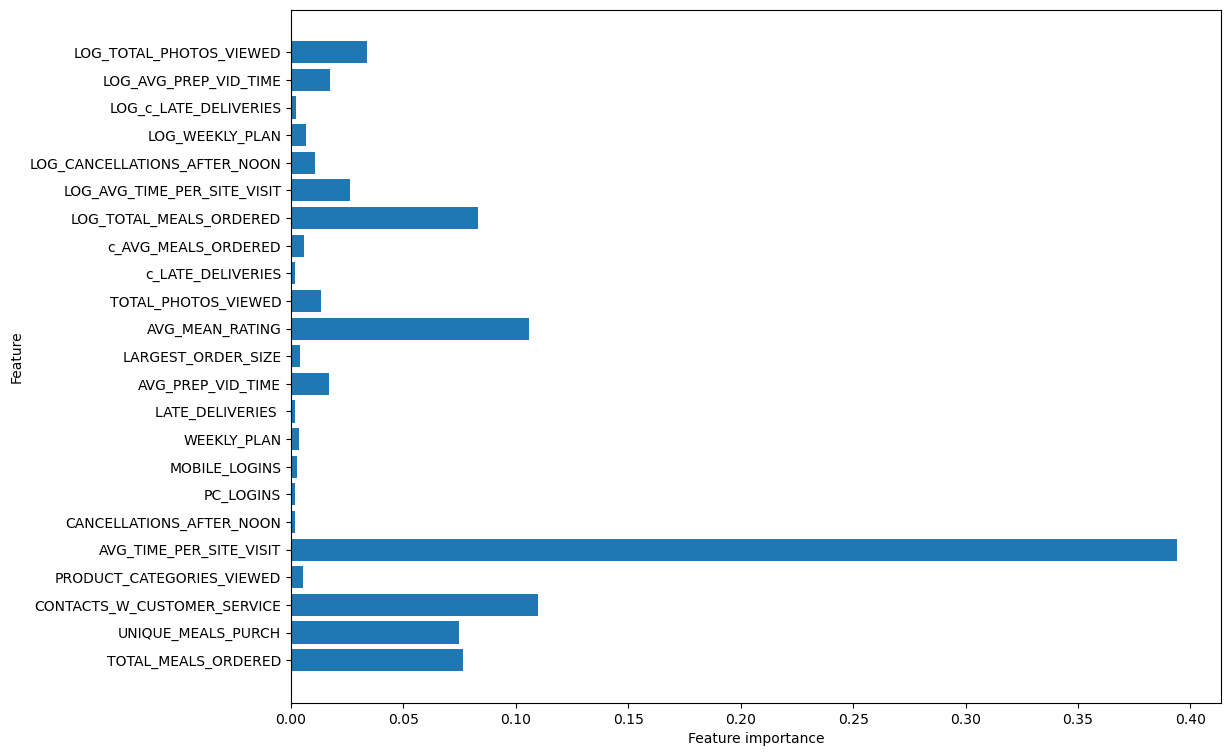

In [18]:
# plotting feature importance for DecisionTreeRegressor
print("Feature Importance for Decision Tree Regressor")
plot_feature_importances(model,
                         train = x_train,
                         export = False)

In [19]:
# Checking test score for RandomForestRegressor
model_name = 'Pruned Random Forest'


# INSTANTIATING a random forest model with default values
model_2 = RandomForestRegressor(n_estimators     = 100,
                              criterion        = 'mse',
                              max_depth        = 4,
                              min_samples_leaf = 25,
                              bootstrap        = True,
                              warm_start       = False,
                              random_state     = 219)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 1.0
Testing Score  : 0.5467
Train-Test Gap : 0.4533


Feature Importance for Random Forest Regressor


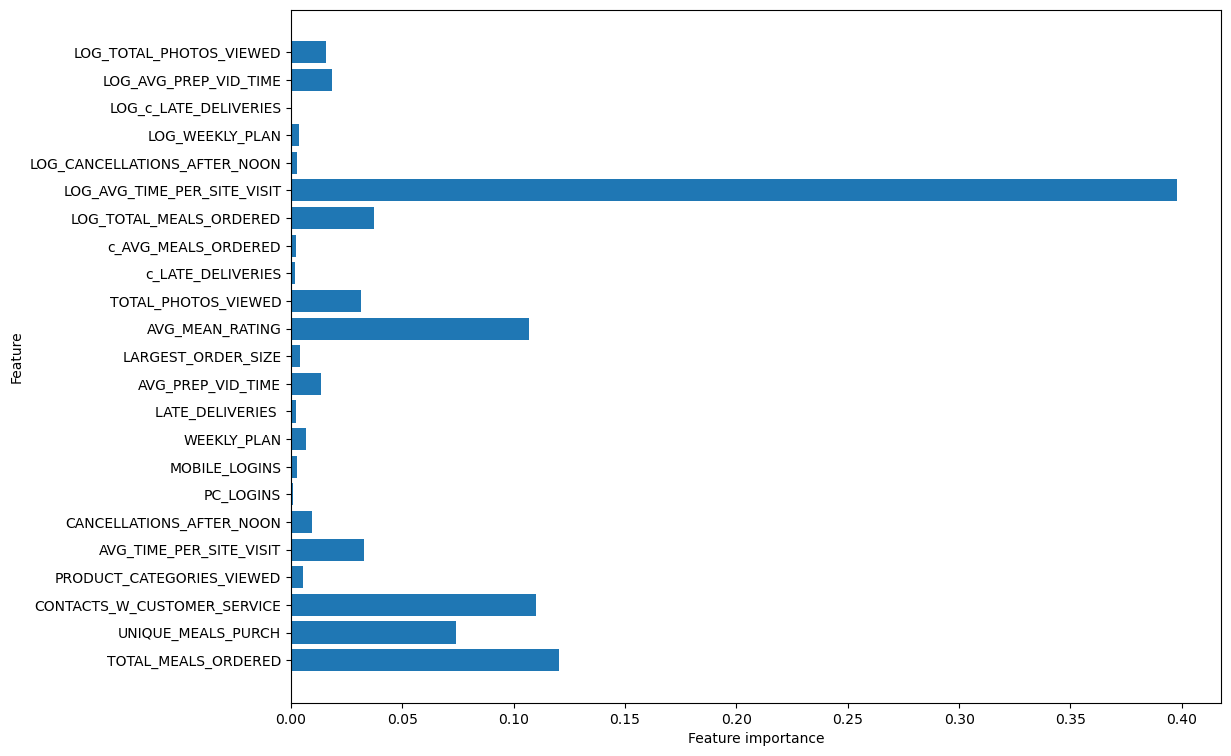

In [20]:
# plotting feature importance for RandomForestRegressor
print("Feature Importance for Random Forest Regressor")
plot_feature_importances(model,
                         train = x_train,
                         export = False)

In [21]:
# Checking test score for GradientBoostingRegressor
model_name = 'Unpruned GBM'


# INSTANTIATING the model object
model = GradientBoostingRegressor(loss          = 'squared_error',
                                  learning_rate = 0.1,
                                  n_estimators  = 100,
                                  criterion     = 'friedman_mse',
                                  max_depth     = 3,
                                  warm_start    = False,
                                  random_state  = 219)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.8991
Testing Score  : 0.737
Train-Test Gap : 0.1621


Feature Importance for Gradient Boosting Regressor


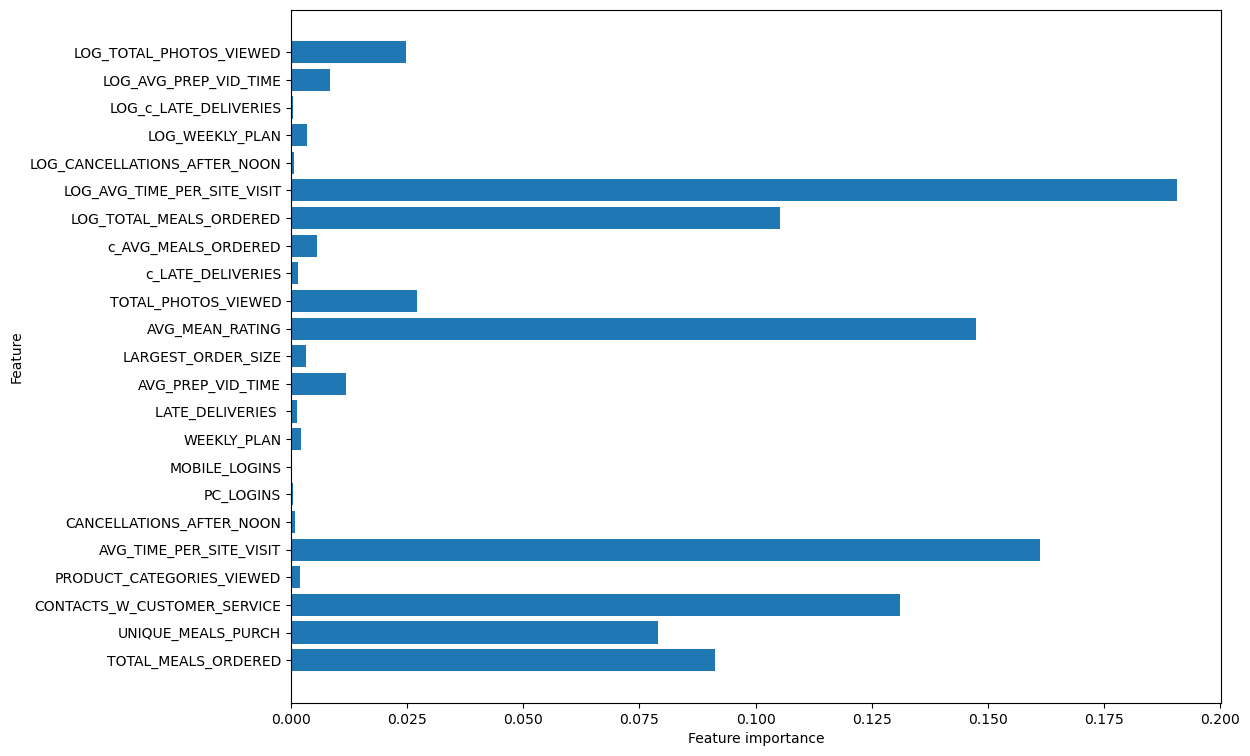

In [22]:
# plotting feature importance for Gradient Boosting Regressor
print("Feature Importance for Gradient Boosting Regressor")
plot_feature_importances(model,
                         train = x_train,
                         export = False)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3>Scatter Plots for Features</h3><br>

Here we have developed scatter plots for all the features now in the dataset. This will help us understand how the features are behaving and what are the probable feature engineering that we can do to better the original feature. 

Here we have plotted the features against LOG_REVENUE. In the backend the plotting was done against both REVENUE and LOG_REVENUE but here we have shown only got LOG_REVENUE. This will be more clear when we decide whether to go ahead with REVENUE or LOG_REVENUE late on. 





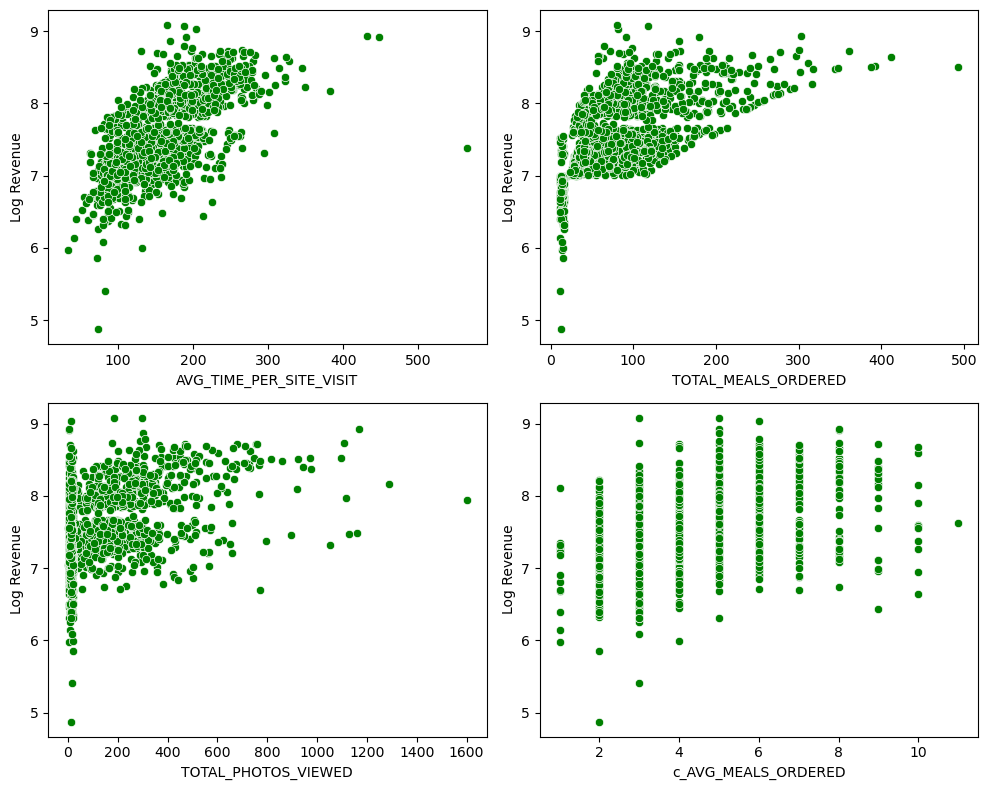

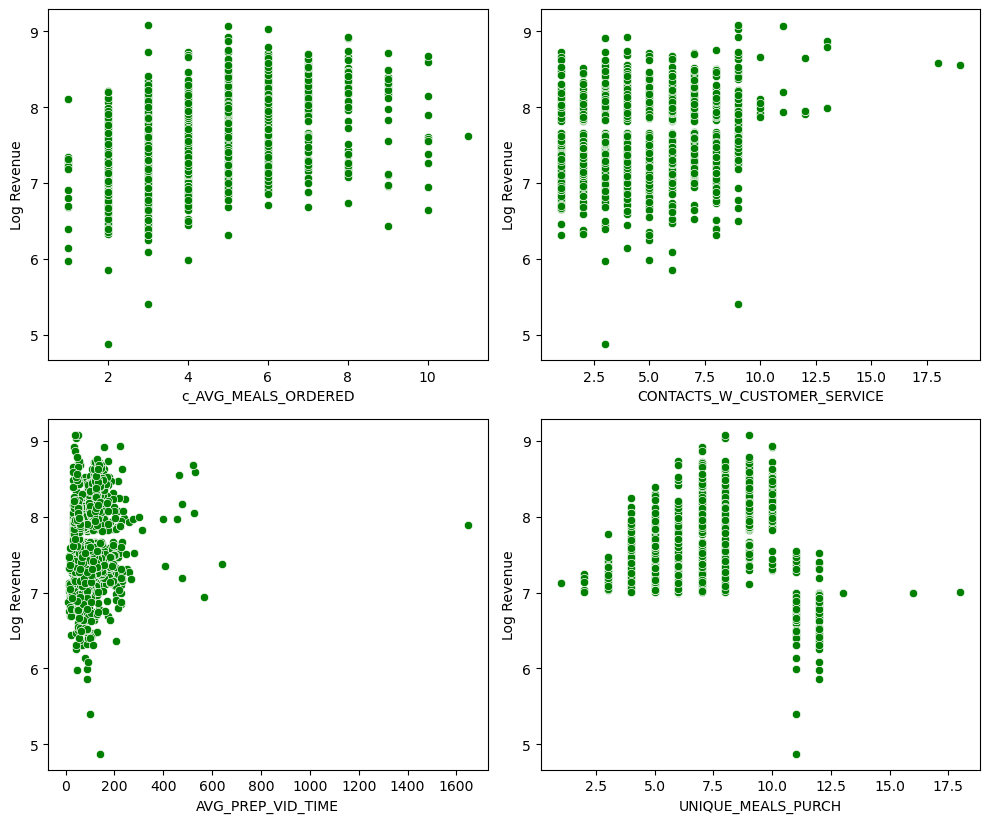

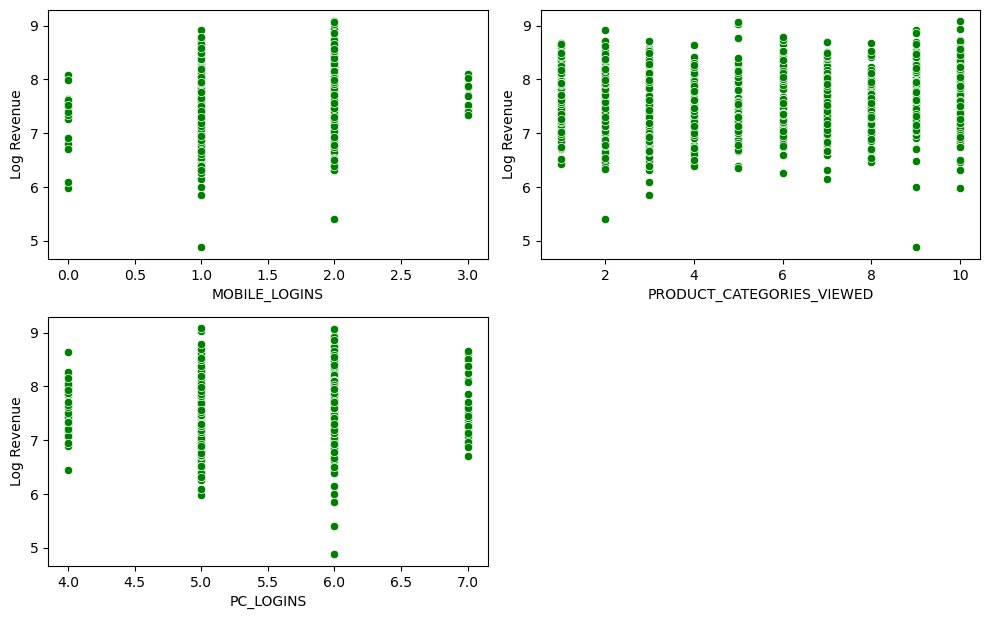

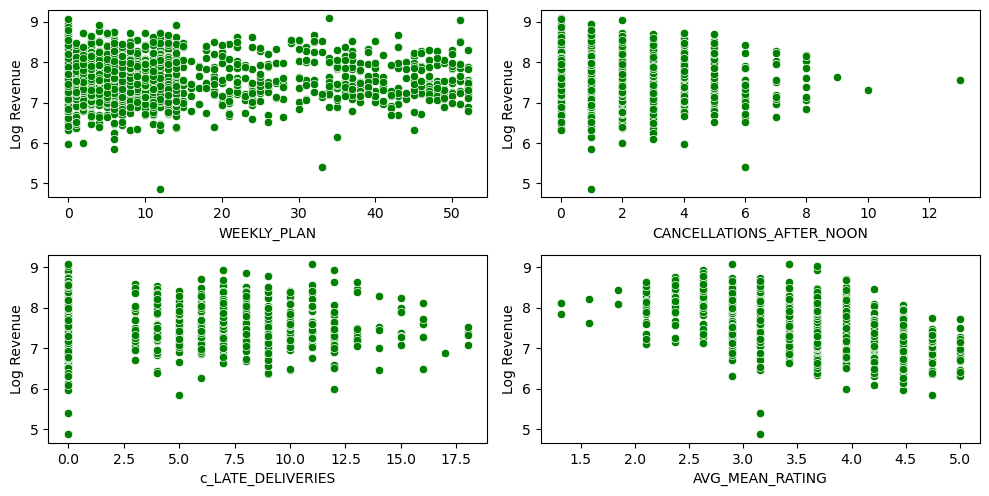

In [23]:
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['AVG_TIME_PER_SITE_VISIT'],
                y = chef['LOG_REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_TIME_PER_SITE_VISIT')
plt.ylabel(ylabel = 'Log Revenue')


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['TOTAL_MEALS_ORDERED'],
                y = chef['LOG_REVENUE'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'TOTAL_MEALS_ORDERED')
plt.ylabel(ylabel = 'Log Revenue')


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['TOTAL_PHOTOS_VIEWED'],
                y = chef['LOG_REVENUE'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'TOTAL_PHOTOS_VIEWED')
plt.ylabel(ylabel = 'Log Revenue')


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['c_AVG_MEALS_ORDERED'],
                y = chef['LOG_REVENUE'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'c_AVG_MEALS_ORDERED')
plt.ylabel(ylabel = 'Log Revenue')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()

plt.show()


######################################################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = chef['c_AVG_MEALS_ORDERED'],
                y = chef['LOG_REVENUE'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'c_AVG_MEALS_ORDERED')
plt.ylabel(ylabel = 'Log Revenue')





# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = chef['CONTACTS_W_CUSTOMER_SERVICE'],
                y = chef['LOG_REVENUE'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'CONTACTS_W_CUSTOMER_SERVICE')
plt.ylabel(ylabel = 'Log Revenue')





# developing a scatterplot
plt.subplot(3, 2, 3)
sns.scatterplot(x = chef['AVG_PREP_VID_TIME'],
                y = chef['LOG_REVENUE'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_PREP_VID_TIME')
plt.ylabel(ylabel = 'Log Revenue')



# developing a scatterplot
plt.subplot(3, 2, 4)
sns.scatterplot(x = chef['UNIQUE_MEALS_PURCH'],
                y = chef['LOG_REVENUE'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'UNIQUE_MEALS_PURCH')
plt.ylabel(ylabel = 'Log Revenue')



plt.tight_layout()

plt.show()


################################################


# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))

# developing a scatterplot
plt.subplot(4, 2, 1)
sns.scatterplot(x = chef['MOBILE_LOGINS'],
                y = chef['LOG_REVENUE'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'MOBILE_LOGINS')
plt.ylabel(ylabel = 'Log Revenue')


# developing a scatterplot
plt.subplot(4, 2, 2)
sns.scatterplot(x = chef['PRODUCT_CATEGORIES_VIEWED'],
                y = chef['LOG_REVENUE'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'PRODUCT_CATEGORIES_VIEWED')
plt.ylabel(ylabel = 'Log Revenue')


# developing a scatterplot
plt.subplot(4, 2, 3)
sns.scatterplot(x = chef['PC_LOGINS'],
                y = chef['LOG_REVENUE'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'PC_LOGINS')
plt.ylabel(ylabel = 'Log Revenue')

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()

plt.show()


###############################################


# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))

# developing a scatterplot
plt.subplot(5, 2, 1)
sns.scatterplot(x = chef['WEEKLY_PLAN'],
                y = chef['LOG_REVENUE'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'WEEKLY_PLAN')
plt.ylabel(ylabel = 'Log Revenue')

# developing a scatterplot
plt.subplot(5, 2, 2)
sns.scatterplot(x = chef['CANCELLATIONS_AFTER_NOON'],
                y = chef['LOG_REVENUE'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'CANCELLATIONS_AFTER_NOON')
plt.ylabel(ylabel = 'Log Revenue')


# developing a scatterplot
plt.subplot(5, 2, 3)
sns.scatterplot(x = chef['c_LATE_DELIVERIES'],
                y = chef['LOG_REVENUE'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'c_LATE_DELIVERIES')
plt.ylabel(ylabel = 'Log Revenue')


# developing a scatterplot
plt.subplot(5, 2, 4)
sns.scatterplot(x = chef['AVG_MEAN_RATING'],
                y = chef['LOG_REVENUE'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_MEAN_RATING')
plt.ylabel(ylabel = 'Log Revenue')

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()

plt.show()





<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Feature Engineering</h2><br>


<h3>Engineering existing features</h3><br>

<h4><b>Unique meals purchased</b><br></h4>

As per the scatter plot and box plots below we clearly see a change in revenue happening as the unique meals purchase go above 10. We split the data as below:

1. UNIQUE_MEALS_PURCH < 10 implies less unique meals purchased and hence we give it a 0
2. UNIQUE_MEALS_PURCH >= 10 implies more unique meals purchased and we give the new column a 1

We create a new feature UNIQUE_MEALS_CAT and store the values here. 

Upon checking the correlation with both REVENUE and LOG_REVENUE we see an improvement in correlation and <b>hence we will consider this new feature in the final model.</b><br>


Apart from the above, we tried engineering below variables, however the correlation after engineering was also low and hence we have not considered these in the final model:

1. PRODUCT_CATEGORIES_VIEWED: We split this in to three categories - LESS_VIEWS, MID_VIEWS and HIGH_VIEWS and then performed one hot encoding to make dummy columns and check correlation with the new columns. The correlation for all three dummies was very weak. 

2. CANCELLATIONS_AFTER_NOON, c_LATE_DELIVERIES and WEEKLY_PLAN: We split these features in 0 and non-zero, 0 if the particular thing happened (example: if the customer is enrolled in weekly plan then he gets 1 if not then 0) and then checked the correlation. It was weak in all three cases. (the code has been shared here)

Other multiple engineerings were done on variables like CONTACTS_W_CUSTOMER_SERVICE, c_AVG_MEALS_ORDERED and WEEKLY_PLAN(apart from above), however the correlation was weak and hence were not included in the final model. 



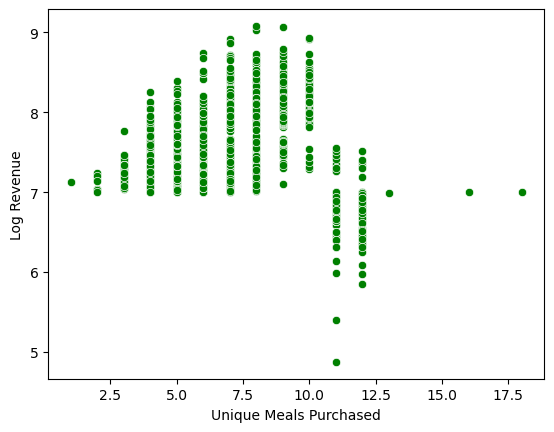

In [24]:
#creating a scatter plot
sns.scatterplot(x = chef['UNIQUE_MEALS_PURCH'],
                y = chef['LOG_REVENUE'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'Unique Meals Purchased')
plt.ylabel(ylabel = 'Log Revenue')
plt.show()


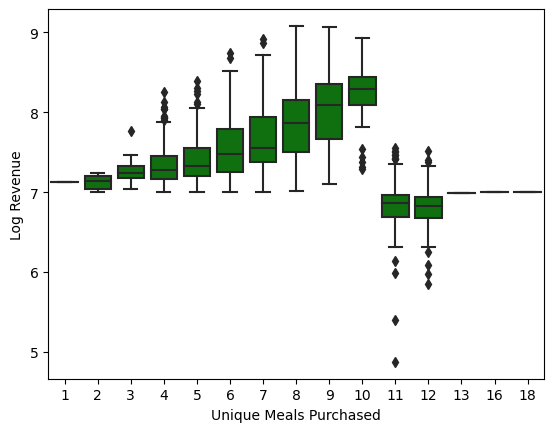

In [25]:
#creating a box plot
sns.boxplot(x = chef['UNIQUE_MEALS_PURCH'],
                y = chef['LOG_REVENUE'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'Unique Meals Purchased')
plt.ylabel(ylabel = 'Log Revenue')
plt.show()

In [26]:
# understanding teh UNIQUE_MEALS_PURCH data split
print(f"""{chef['UNIQUE_MEALS_PURCH'].value_counts(normalize = False).sort_index()}""")

1       1
2       8
3      53
4     180
5     292
6     356
7     378
8     256
9     138
10     68
11    121
12     92
13      1
16      1
18      1
Name: UNIQUE_MEALS_PURCH, dtype: int64


In [27]:
# placeholder variables
chef['UNIQUE_MEALS_CAT'] = 0



for index, value in chef.iterrows():
    

    # UNIQUE_MEALS_PURCH
    if chef.loc[index, 'UNIQUE_MEALS_PURCH'] < 10:
        chef.loc[index, 'UNIQUE_MEALS_CAT'] = 0
        
    else:
        chef.loc[index, 'UNIQUE_MEALS_CAT'] = 1
        
# checking results
chef[  ['UNIQUE_MEALS_CAT']  ].head(n = 10)

,UNIQUE_MEALS_CAT
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1
8,0
9,0


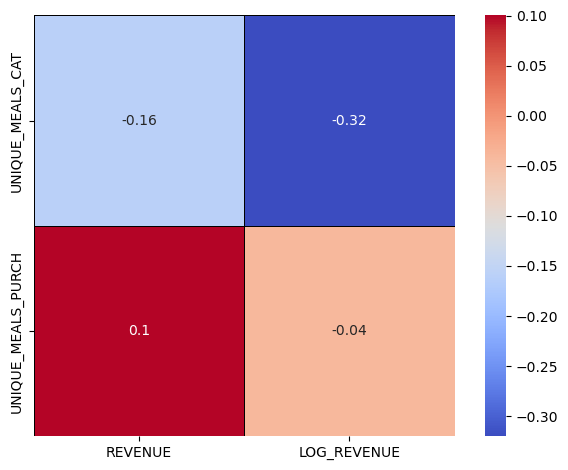

In [28]:
# checking the correlations of the newly-created variables with REVENUE and LOG_REVENUE

new_corr = chef.corr().round(2)

unique_meals_corr = new_corr.loc[['UNIQUE_MEALS_CAT', 'UNIQUE_MEALS_PURCH'], ['REVENUE','LOG_REVENUE']] 

sns.heatmap(unique_meals_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)


# saving and displaying the correlation matrix

plt.tight_layout()
plt.show()

In [29]:
# counting the number of zeroes for c_LATE_DELIVERIES, CANCELLATIONS_AFTER_NOON and WEEKLY_PLAN
late_del_zeroes   = len(chef['c_LATE_DELIVERIES'][chef['c_LATE_DELIVERIES'] == 0]) # Late deliveries
cancel_zeroes     = len(chef['CANCELLATIONS_AFTER_NOON'][chef['CANCELLATIONS_AFTER_NOON'] == 0]) # Cancellations after noon
weekplan_zeroes   = len(chef['WEEKLY_PLAN'][chef['WEEKLY_PLAN'] == 0]) # Cancellations after noon


# printing a table of the results
print(f"""
                 No\t\tYes
               ---------------------
Late Deliveries| {late_del_zeroes}\t\t{len(chef) - late_del_zeroes}
Cancellations  | {cancel_zeroes}\t\t{len(chef) - cancel_zeroes}
Weekly Plan    | {weekplan_zeroes}\t\t{len(chef) - weekplan_zeroes}

""")


                 No		Yes
               ---------------------
Late Deliveries| 1433		513
Cancellations  | 572		1374
Weekly Plan    | 468		1478




In [30]:
# placeholder variables
chef['WAS_LATE']      = 0
chef['WAS_CANCELLED'] = 0
chef['HAS_WEEKPLAN']  = 0


# iterating over each original column to
# change values in the new feature columns
for index, value in chef.iterrows():


    # lATE DELIVERIES
    if chef.loc[index, 'c_LATE_DELIVERIES'] == 0:
        chef.loc[index, 'WAS_LATE'] = 1
    else:
        0
        
        
    # CANCELLATION AFTER NOON
    if chef.loc[index, 'CANCELLATIONS_AFTER_NOON'] == 0:
        chef.loc[index, 'WAS_CANCELLED'] = 1
    
    else: 
        0
        
    # If they have a weekly plan
    if chef.loc[index, 'WEEKLY_PLAN'] > 0:
        chef.loc[index, 'HAS_WEEKPLAN'] = 1
    
    else: 
        0

In [31]:
# checking above values in the dataset
chef[  ['WAS_LATE', 'WAS_CANCELLED', 'HAS_WEEKPLAN']  ].head(n = 5)

,WAS_LATE,WAS_CANCELLED,HAS_WEEKPLAN
0,1,0,0
1,1,0,0
2,1,1,1
3,1,0,0
4,1,1,1


In [32]:
zeroes_corr_1 = chef.corr().round(decimals = 2)


# checking the correlations of the newly-created variables with features -WAS_LATE, WAS_CANCELLED, HAS_WEEKPLAN
zeroes_corr_1.loc['LOG_REVENUE',                   # Y-variable
               ['WAS_LATE', 'WAS_CANCELLED', 'HAS_WEEKPLAN']].sort_values(ascending = False)

WAS_LATE         0.03
WAS_CANCELLED   -0.01
HAS_WEEKPLAN    -0.03
Name: LOG_REVENUE, dtype: float64

<br>
<h3>Contact with Customer Service</h3>

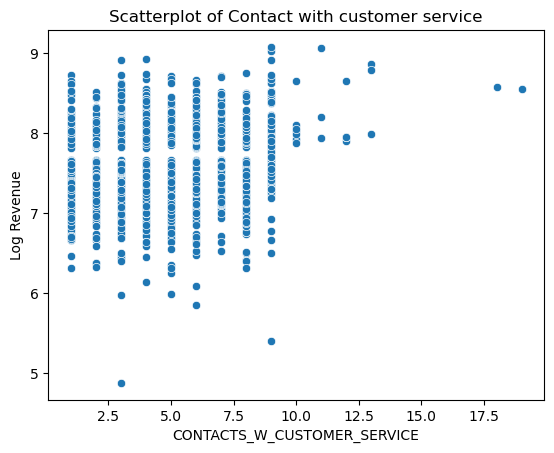

In [33]:
# scatterplot - CONTACTS_W_CUSTOMER_SERVICE and Log Revenue
sns.scatterplot(x    = 'CONTACTS_W_CUSTOMER_SERVICE',
                y    = 'LOG_REVENUE',
                data = chef)


# titles and axis labels
plt.title(label   = 'Scatterplot of Contact with customer service')
plt.xlabel(xlabel = 'CONTACTS_W_CUSTOMER_SERVICE')
plt.ylabel(ylabel = 'Log Revenue')


# displaying the plot
plt.show()

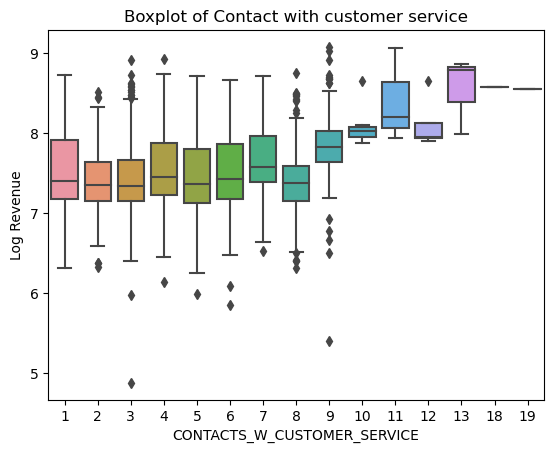

In [34]:
# boxp plot - CONTACTS_W_CUSTOMER_SERVICE and Log Revenue
sns.boxplot(x    = 'CONTACTS_W_CUSTOMER_SERVICE',
            y    = 'LOG_REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot of Contact with customer service')
plt.xlabel(xlabel = 'CONTACTS_W_CUSTOMER_SERVICE')
plt.ylabel(ylabel = 'Log Revenue')


# displaying the plot
plt.show()

In [35]:
# checking mean and count of LOG_REVENUE for the each value of CONTACTS_W_CUSTOMER_SERVICE
print(chef.groupby('CONTACTS_W_CUSTOMER_SERVICE')['LOG_REVENUE'].agg(['mean', 'count']))

                                 mean  count
CONTACTS_W_CUSTOMER_SERVICE                 
1                            7.503347    173
2                            7.414636    170
3                            7.445738    338
4                            7.546753    260
5                            7.451928    214
6                            7.499632    226
7                            7.664966    205
8                            7.423942    179
9                            7.837731    162
10                           8.090609      7
11                           8.403785      3
12                           8.117269      4
13                           8.547127      3
18                           8.585786      1
19                           8.555428      1


In [36]:
# Feature Engineering Contacts with customer service 

# placeholder variables
cross_sell['CONT_W_CS_CAT'] = 0

for index, value in chef.iterrows():
    

    # Alloting 0 if CONTACTS_W_CUSTOMER_SERVICE <10
    if cross_sell.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] < 10:
        cross_sell.loc[index, 'CONT_W_CS_CAT'] = 0
        
    else:
        # Alotting 1 if CONTACTS_W_CUSTOMER_SERVICE >=10
        cross_sell.loc[index, 'CONT_W_CS_CAT'] = 1
        
# checking results
cross_sell[  ['CONT_W_CS_CAT']  ].head(n = 5)

,CONT_W_CS_CAT
0,0
1,0
2,0
3,0
4,0


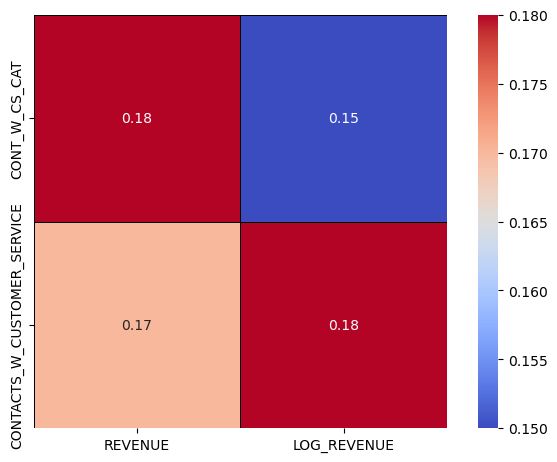

In [37]:
# checking the correlations of the newly-created variable with REVENUE and LOG_REVENUE

new_corr_3 = chef.corr().round(2)

contacts_corr = new_corr_3.loc[ ['CONT_W_CS_CAT','CONTACTS_W_CUSTOMER_SERVICE'], ['REVENUE','LOG_REVENUE']] 

sns.heatmap(contacts_corr,
            cmap='coolwarm',
            square=True,
            annot=True,
            linecolor='black',
            linewidths=0.5)

# displaying the correlation matrix
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>


<h3>Creating new features</h3>

Here we have engineered new features and have seen their impact on the Y-variable (REVENUE and LOG_REVENUE).

<b>1. Total Logins (TOTAL_LOGINS)<br></b>

We have combined the PC logins and Mobile logins to arrive at the Total Logins. 

<b>2. Cancel Proportion (CANCEL_PROP)<br></b>

This feature shows meals canceled as a proportion of total meals ordered. The assumption is that higher the percentage of cancellation proportion, lesser be the revenue (Y-variable). 

<b>3. Photos viewed per total login (PHOTO_PER_LOGIN)</b>

We have tried to find the Photos per Total login which was calculated above. The assumption here is that higher the number of photos per login, more will be the propensity to order meals and generate more revenue (Y-variable)

<b>4. Product categories viewed per total logins (PRO_CAT_LOGIN)</b>

Here we find the proportion of product categories viewed per total logins. The assumption here is if the number of categories per login is high, then the user might order more meals and hence increase the revenue (Y-variable). <br>

<br>We then check the correlation of new features with REVENUE and LOG_REVENUE. For each new feature we develop the heat map for both the new feature and the original feature used if the original feature is in the important feature list above. 

We also check the correlation between the new feature and the original feature. If the correlation is high then the features are highly interdependent and cannot be used together in the model.

Upon doing the above analysis basis correlation we conclude that <b>PHOTO_PER_LOGIN and CANCEL_PROP</b> has a decent correlation with REVENUE and LOG_REVENUE and hence we sill only deep dive further in these two understand their relevance for the model. 

In [38]:
# Engineering new features and testing their impact on the Y-variable

chef['TOTAL_LOGINS'] = chef['PC_LOGINS'] + chef['MOBILE_LOGINS']

chef['CANCEL_PROP'] = chef['CANCELLATIONS_AFTER_NOON'] / chef['TOTAL_MEALS_ORDERED']
chef['PHOTO_PER_LOGIN'] = chef['TOTAL_PHOTOS_VIEWED'] / chef['TOTAL_LOGINS']
chef['PRO_CAT_LOGIN'] = chef['PRODUCT_CATEGORIES_VIEWED'] / chef['TOTAL_LOGINS']


# creating a (Pearson) correlation matrix
df_corr = chef.corr().round(2)


# printing (Pearson) correlations with REVENUE and LOG_REVENUE
df_corr.loc[ ['TOTAL_LOGINS','CANCEL_PROP','PHOTO_PER_LOGIN', 'PRO_CAT_LOGIN'] 
            , ['REVENUE', 'LOG_REVENUE'] ].sort_values(by        = 'REVENUE',
                                                       ascending = False)

,REVENUE,LOG_REVENUE
PHOTO_PER_LOGIN,0.46,0.42
TOTAL_LOGINS,0.06,0.06
PRO_CAT_LOGIN,0.02,0.02
CANCEL_PROP,-0.28,-0.36



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<b>Photos viewed per total login (PHOTO_PER_LOGIN)</b>
    
PHOTO_PER_LOGIN has a lower correlation with both REVENUE and LOG_REVENUE than TOTAL_PHOTOS_VIEWED. Also the correlation of PHOTO_PER_LOGIN with TOTAL_PHOTOS_VIEWED is very high (0.99) and hence this new feature cannot be used for the model.


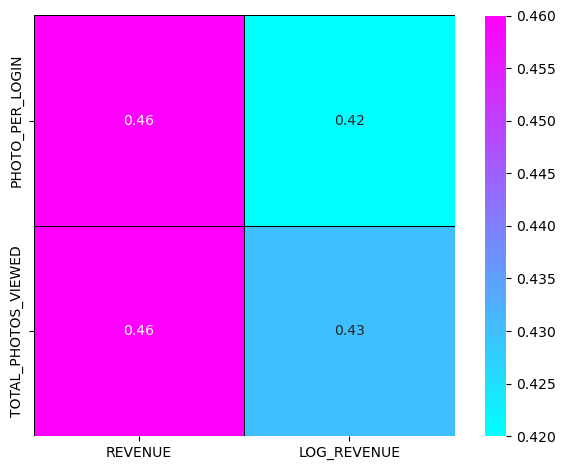

,TOTAL_PHOTOS_VIEWED
PHOTO_PER_LOGIN,0.99


In [39]:
corr_chef_1 = chef.corr().round(2)
corr_chef_1.loc[['PHOTO_PER_LOGIN','TOTAL_PHOTOS_VIEWED'], ['REVENUE', 'LOG_REVENUE']]


# visualizing the correlation matrix
sns.heatmap(corr_chef_1.loc[['PHOTO_PER_LOGIN','TOTAL_PHOTOS_VIEWED'], ['REVENUE', 'LOG_REVENUE']],
            cmap = 'cool',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)

plt.tight_layout()
plt.show()


corr_chef_1.loc[['PHOTO_PER_LOGIN'],['TOTAL_PHOTOS_VIEWED']]

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<b>Cancel Proportion (CANCEL_PROP)</b>
    
CANCEL_PROP has a weak correlation with both REVENUE and LOG_REVENUE than TOTAL_MEALS_ORDERED. However, it's correlation with TOTAL_MEALS_ORDERED is also weak. Hence, we will not use this new feature in our model. 

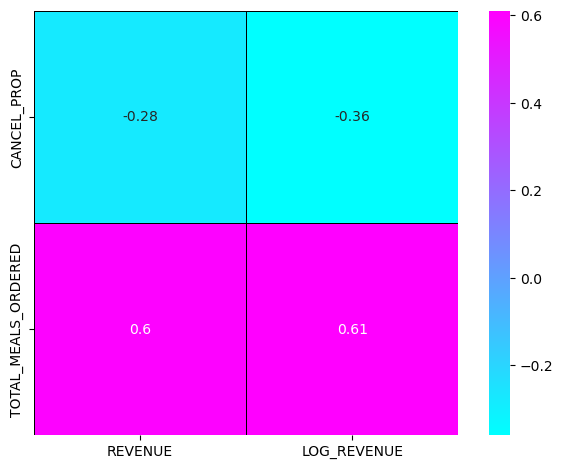

,TOTAL_MEALS_ORDERED
CANCEL_PROP,-0.35


In [40]:
# visualizing the correlation matrix
sns.heatmap(corr_chef_1.loc[['CANCEL_PROP','TOTAL_MEALS_ORDERED'], ['REVENUE', 'LOG_REVENUE']],
            cmap = 'cool',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)

plt.tight_layout()
plt.show()

corr_chef_1.loc[['CANCEL_PROP'],['TOTAL_MEALS_ORDERED']]


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3> Final Y-Variable: REVENUE or LOG_REVENUE</h3><br>

Here we are checking the final correlation of all the features and then finalizing whether to use REVENUE or LOG_REVENUE as our Y-variable. 

We find that LOG_REVENUE is better as a Y-variable than REVENUE.

In [41]:
# creating a (Pearson) correlation matrix
chef_corr_check = chef.corr().round(2)


# printing (Pearson) correlations with REVENUE and LOG_REVENUE
chef_corr_check.loc[ : , ['REVENUE', 'LOG_REVENUE'] ].sort_values(by = 'LOG_REVENUE',
                                                                ascending = False)

,REVENUE,LOG_REVENUE
LOG_REVENUE,0.95,1.00
REVENUE,1.00,0.95
LOG_TOTAL_MEALS_ORDERED,0.61,0.69
LOG_AVG_TIME_PER_SITE_VISIT,0.63,0.67
AVG_TIME_PER_SITE_VISIT,0.64,0.65
TOTAL_MEALS_ORDERED,0.60,0.61
LARGEST_ORDER_SIZE,0.44,0.45
c_AVG_MEALS_ORDERED,0.44,0.45
TOTAL_PHOTOS_VIEWED,0.46,0.43
PHOTO_PER_LOGIN,0.46,0.42


In [42]:
# subsetting for REVENUE
rev_corr = chef_corr_check.loc[ : , ['REVENUE', 'LOG_REVENUE'] ].sort_values(by = 'REVENUE',
                                                                 ascending = False)


# removing irrelevant correlations
rev_corr = rev_corr.iloc[ 2: , :]


# placeholder column for y-variable recommendation
rev_corr['recommended'] = 0


# filling in placeholder
for index, column in rev_corr.iterrows():
    
    # if REVENUE is higher
    if abs(rev_corr.loc[ index, 'REVENUE']) >  abs(rev_corr.loc[ index, 'LOG_REVENUE']):
        rev_corr.loc[ index , 'recommended'] = 'REVENUE'
        
        
    # if LOG_REVENUE is higher 
    elif abs(rev_corr.loc[ index, 'REVENUE']) <  abs(rev_corr.loc[ index, 'LOG_REVENUE']):
        rev_corr.loc[ index , 'recommended'] = 'LOG_REVENUE'
    
    
    # in case they are tied
    else:
        rev_corr.loc[ index , 'recommended'] = 'Tie'
        

# checking results
rev_corr["recommended"].value_counts(normalize = True,
                                       sort      = True,
                                       ascending = False).round(decimals = 2)

LOG_REVENUE    0.50
Tie            0.31
REVENUE        0.19
Name: recommended, dtype: float64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3>Final Modeling</h3><br>

For the modeling we will be using the below:<br>

<b>Y-Variable (response variable)</b>    : <br>

1. LOG_REVENUE<br><br>

<b>X-Variable (independent variable)</b> : <br>

1. TOTAL_MEALS_ORDERED
2. LOG_AVG_TIME_PER_SITE_VISIT
3. c_AVG_MEALS_ORDERED
4. TOTAL_PHOTOS_VIEWED
5. AVG_MEAN_RATING
6. CONTACTS_W_CUSTOMER_SERVICE
7. UNIQUE_MEALS_CAT<br><br>
                                    
<b>Models used below</b>                  : <br>

1. Linear Regression
2. Unpruned Regression Tree 
3. Pruned Regression Tree
4. Unpruned Random Forest
5. Pruned Random Forest 
6. Unpruned Gradient Boosting Regressor <br><br>
                                            
                                            
The final model selected is stated in the end as per the requirement of the assignment. 

Below documentation was used to understand the models better:

1. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression
3. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor
                                     
                                     
   
                                     
                                     

In [43]:
from sklearn.model_selection import train_test_split # train/test split
import sklearn.linear_model # linear modeling in scikit-learn

In [44]:
# x-variables 
x_var  =      ['TOTAL_MEALS_ORDERED',
               'LOG_AVG_TIME_PER_SITE_VISIT',
               'c_AVG_MEALS_ORDERED', 
               'TOTAL_PHOTOS_VIEWED',
               'AVG_MEAN_RATING',
               'CONTACTS_W_CUSTOMER_SERVICE'
               ,'UNIQUE_MEALS_CAT']

In [45]:
# preparing for scikit-learn

# preparing x-variables from the OLS model
x_data = chef[ x_var ]


# preparing response variable
y_data  = chef['LOG_REVENUE']


###############################################
## setting up more than one train-test split ##
###############################################
x_train, x_test, y_train, y_test = train_test_split(
            x_data, # x-variables (can change this)
            y_data, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 219)

In [46]:
# Setting a model name for Liner Regression model
model_name = "Linear Regression"


# INSTANTIATING a model object 
model = sklearn.linear_model.LinearRegression()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Model Name     :', model_name)
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Model Name     : Linear Regression
Training Score : 0.6663
Testing Score  : 0.6608
Train-Test Gap : 0.0055


In [47]:
model_name = 'Unpruned Regression Tree'

# INSTANTIATING a model object 
model = DecisionTreeRegressor()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Model Name     :', model_name)
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Model Name     : Unpruned Regression Tree
Training Score : 1.0
Testing Score  : 0.5419
Train-Test Gap : 0.4581


In [48]:
model_name = 'Pruned Regression Tree'

# INSTANTIATING a model object
model = DecisionTreeRegressor(max_depth        = 5, # tuning to arrive at the best option
                              min_samples_leaf = 25,
                              random_state     = 219)


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results

print('Model Name     :', model_name)
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Model Name     : Pruned Regression Tree
Training Score : 0.728
Testing Score  : 0.7004
Train-Test Gap : 0.0276


In [49]:
##### specifying a model name
model_name = 'Unpruned Random Forest'


# INSTANTIATING a random forest model with default values
model = RandomForestRegressor(n_estimators     = 100, # build 100 trees
                              criterion        = 'squared_error', # 
                              max_depth        = None, # 8 or less better, none doesnt mean 0; trees go forever; need to get it down 
                              min_samples_leaf = 1,
                              bootstrap        = True, 
                              warm_start       = False,
                              random_state     = 219)

# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Model Name     :', model_name)
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Model Name     : Unpruned Random Forest
Training Score : 0.9711
Testing Score  : 0.7911
Train-Test Gap : 0.18


In [50]:
# specifying a model name
model_name = 'Pruned Random Forest'


# INSTANTIATING a random forest model with default values
model = RandomForestRegressor(n_estimators     = 100,
                              criterion        = 'mse',
                              max_depth        = 4,
                              min_samples_leaf = 25,
                              bootstrap        = True,
                              warm_start       = False,
                              random_state     = 219)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Model Name     :', model_name)
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Model Name     : Pruned Random Forest
Training Score : 0.7425
Testing Score  : 0.7284
Train-Test Gap : 0.0141


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


In [51]:
############## THIS IS OUR FINAL MODEL #################

# specifying a model name
model_name = 'Gradient Boosting Regressor'


# INSTANTIATING the model object
model = GradientBoostingRegressor(loss          = 'squared_error',
                                  learning_rate = 0.1,
                                  n_estimators  = 40,
                                  criterion     = 'friedman_mse',
                                  max_depth     = 3,
                                  warm_start    = False,
                                  random_state  = 219)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results

print('Model Name     :', model_name)
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Model Name     : Gradient Boosting Regressor
Training Score : 0.8287
Testing Score  : 0.779
Train-Test Gap : 0.0497


In [52]:
print(f"""**********************************************************
FINAL MODEL

Model Type    : {model_name}
Train_Score   : {model_train_score}
Test_Score    : {model_test_score}
Train-Test Gap: {model_gap}

**********************************************************""")

**********************************************************
FINAL MODEL

Model Type    : Gradient Boosting Regressor
Train_Score   : 0.8287
Test_Score    : 0.779
Train-Test Gap: 0.0497

**********************************************************
